#### Data Analysis Assessment-part B ——— Anny
#### Analyse the Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's

#### 1. Load Dataset from Boston Housing Agency into a DataFrame. (10 points)

In [22]:
import pandas as pd
df = pd.read_csv('data\RR-DVIS-UA2 - boston_housing.csv', index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 2. For the "Median value of owner-occupied homes" provide a boxplot. (10 points)

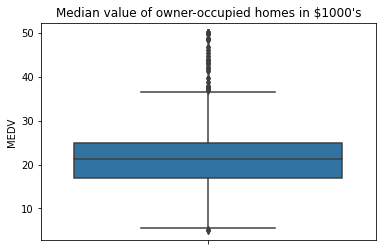

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df, y='MEDV')
plt.title("Median value of owner-occupied homes in $1000's")
plt.show()

#### 3. Provide a histogram for the “Charles river variable”. (10 points)

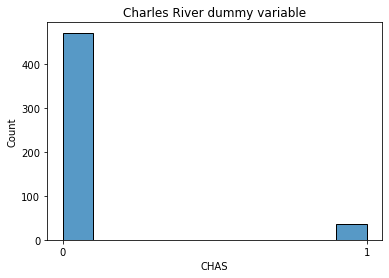

In [3]:
sns.histplot(data=df, x='CHAS')
plt.title('Charles River dummy variable')
plt.xticks([0,1])
plt.show()

#### 4. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35% or less, between 35 and 70% and 70% and over) (10 points)

In [4]:
def getlevel(age):
    if age <= 35:
        return "35% or less"
    elif age <70:
        return "35%~70%"
    else:
        return "70% and over"

df['age_group']=df.apply(lambda x: getlevel(x.AGE), axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35%~70%
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70% and over
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35%~70%


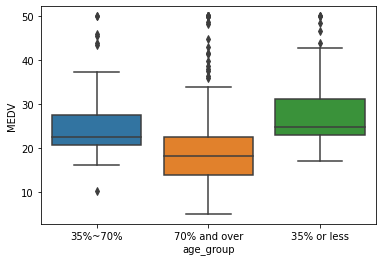

In [5]:
sns.boxplot(data=df, x='age_group', y='MEDV')
plt.show()

#### 5. Provide a scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). What can you say about the relationship? (10 points)

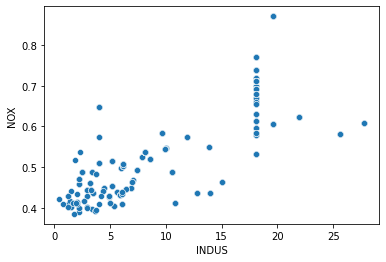

In [6]:
sns.scatterplot(data=df, x='INDUS', y='NOX')
plt.show()

In [7]:
df['INDUS'].corr(df['NOX'])

0.7636514469209147

#### The correlation coefficient of 0.764 indicates a strong positive correlation between NOX and INDUS. This means that as one increases, the other also increases, and vice versa.

#### 6. Create a histogram for the pupil to teacher ratio variable (PTRATIO) (10 points)

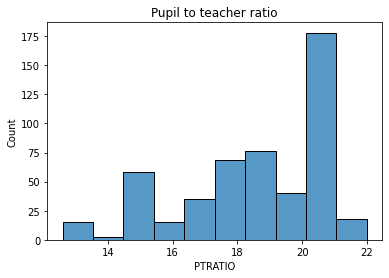

In [8]:
sns.histplot(data=df, x='PTRATIO', bins=10)
plt.title('Pupil to teacher ratio')
plt.show()

#### 7. Is there a significant difference in median value of houses bounded by the Charles river or not? (CHAS) (T-test for independent samples) (10 points)

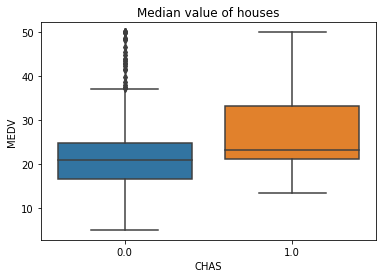

In [9]:
sns.boxplot(data=df,y='MEDV',x='CHAS')
plt.title('Median value of houses' )
plt.show()

In [10]:
from scipy.stats import ttest_ind
charles_river=df[df['CHAS']==1]
not_charles=df[df['CHAS']==0]

#perform independent two sample t-test
ttest_ind(charles_river['MEDV'], not_charles['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### Conclusion: since the p-value is less than 0.05, there is sufficient evidence to say that whether or not bounded by the Charles river lead to different median value of houses.

#### 8. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) (10 points)

In [20]:
import scipy.stats as stats

# Based on discretizing the age variable into three groups of 35% or less, between 35 and 70% and 70% and over.
age_groups=['35% or less', '35%~70%', '70% and over']
age_data=[]
for group in age_groups:
    age_data.append(df[df['age_group']==group]['MEDV'])
    
f_statistic, p_value=stats.f_oneway(*age_data)
print(f'f_statistic = {f_statistic}')
print(f'p_value = {p_value}')

f_statistic = 36.40764999196599
p_value = 1.7105011022702984e-15


#### Conclusion: since the p-value is less than 0.05, there is sufficient evidence to say there is significent difference between median value of each group which have different proportion of owner occupied units built prior to 1940 